In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()


In [4]:
# Hyperparameter Tuning and Cross validation
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs','liblinear','sag','saga']

In [5]:
param = dict(penalty = penalty, C=c_values, solver = solver)
randomcv = RandomizedSearchCV(estimator = model, param_distributions= param, cv = 5, scoring='accuracy')

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model, param_grid= param, scoring='accuracy', cv=cv, n_jobs=-1)

In [9]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0,random_state=10)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=30, random_state=42)

In [13]:
import warnings
warnings.filterwarnings('ignore')
randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [12]:
randomcv.best_score_
randomcv.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}

# Logistic Regression for multiclass classification 


In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification 
X,y = make_classification(n_samples=1000, n_features=10,n_informative=3,n_classes=3, random_state= 42)

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1,

In [16]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='ovr')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=30, random_state=42)

In [18]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred,y_test))

0.6
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.18      0.50      0.27         4
           2       0.90      0.64      0.75        14

    accuracy                           0.60        30
   macro avg       0.62      0.58      0.56        30
weighted avg       0.76      0.60      0.65        30

[[7 5 0]
 [1 2 1]
 [1 4 9]]


# Logistic Regression for Imbalanced Dataset 


In [20]:

from collections import Counter
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)

In [33]:
Counter(y)

Counter({0: 9846, 1: 154})

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=30, random_state=42)

In [24]:
# Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [25]:
params= dict(penalty = penalty, C=c_values, solver=solver, class_weight=class_weight)

In [14]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model, param_grid= params, scoring='accuracy', cv=cv, n_jobs=-1)

In [27]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [28]:
grid.best_score_

0.988665997993982

In [29]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

# ROC AUC Curve

In [30]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [31]:
X,y = make_classification(n_samples=10000, n_classes=2, random_state=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
# dummy model which will give o/p as 0 for any test-data
dummy_model_prob= [0 for _ in range(len(y_test))] # all zeros

In [36]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# prediction based on probability
model_prob= model.predict_proba(X_test)
model_prob= model_prob[:, 1]# model_prob has two probabilities, one for 0 and one for +1 
# I used [:,1] to take the probability for +ve outcome


In [38]:
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9446831742228161


In [39]:
# False positive rate=  FP/(FP + TN) and True positive rate = TP/(TP + FN) : plot TPR on y-axis and FPR on x-axis we get ROC curve.
# Calculate ROC curves:
dummy_fpr, dummy_tpr,_ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)



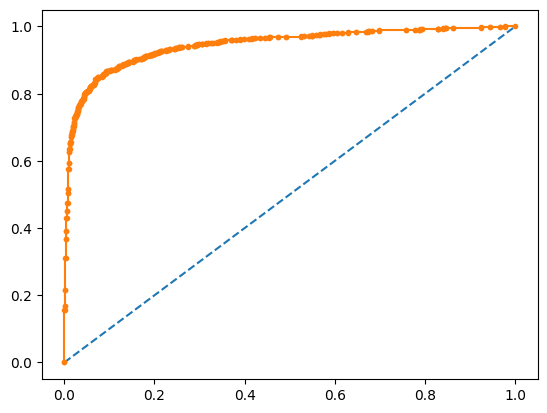

In [40]:
from matplotlib import pyplot 
#fig = pyplot.figure(figsize=(20,50))
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--')
pyplot.plot(model_fpr, model_tpr, marker='.')
#ax = fig.add_subplot(111)
#for xyz in zip(model_fpr, model_tpr, thresholds):
#    ax.annotate('%s'% np.round(xyz[2],2), xy= (xyz[0], xyz[1]))
pyplot.show()